/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[ 5.00000006  5.00014612  5.00058373  5.00131304  5.00233409  5.00364634
  5.00524985]
[ 5.00000006  5.00014612  5.00058373  5.00131304  5.00058373  5.00014612
  5.00000006]


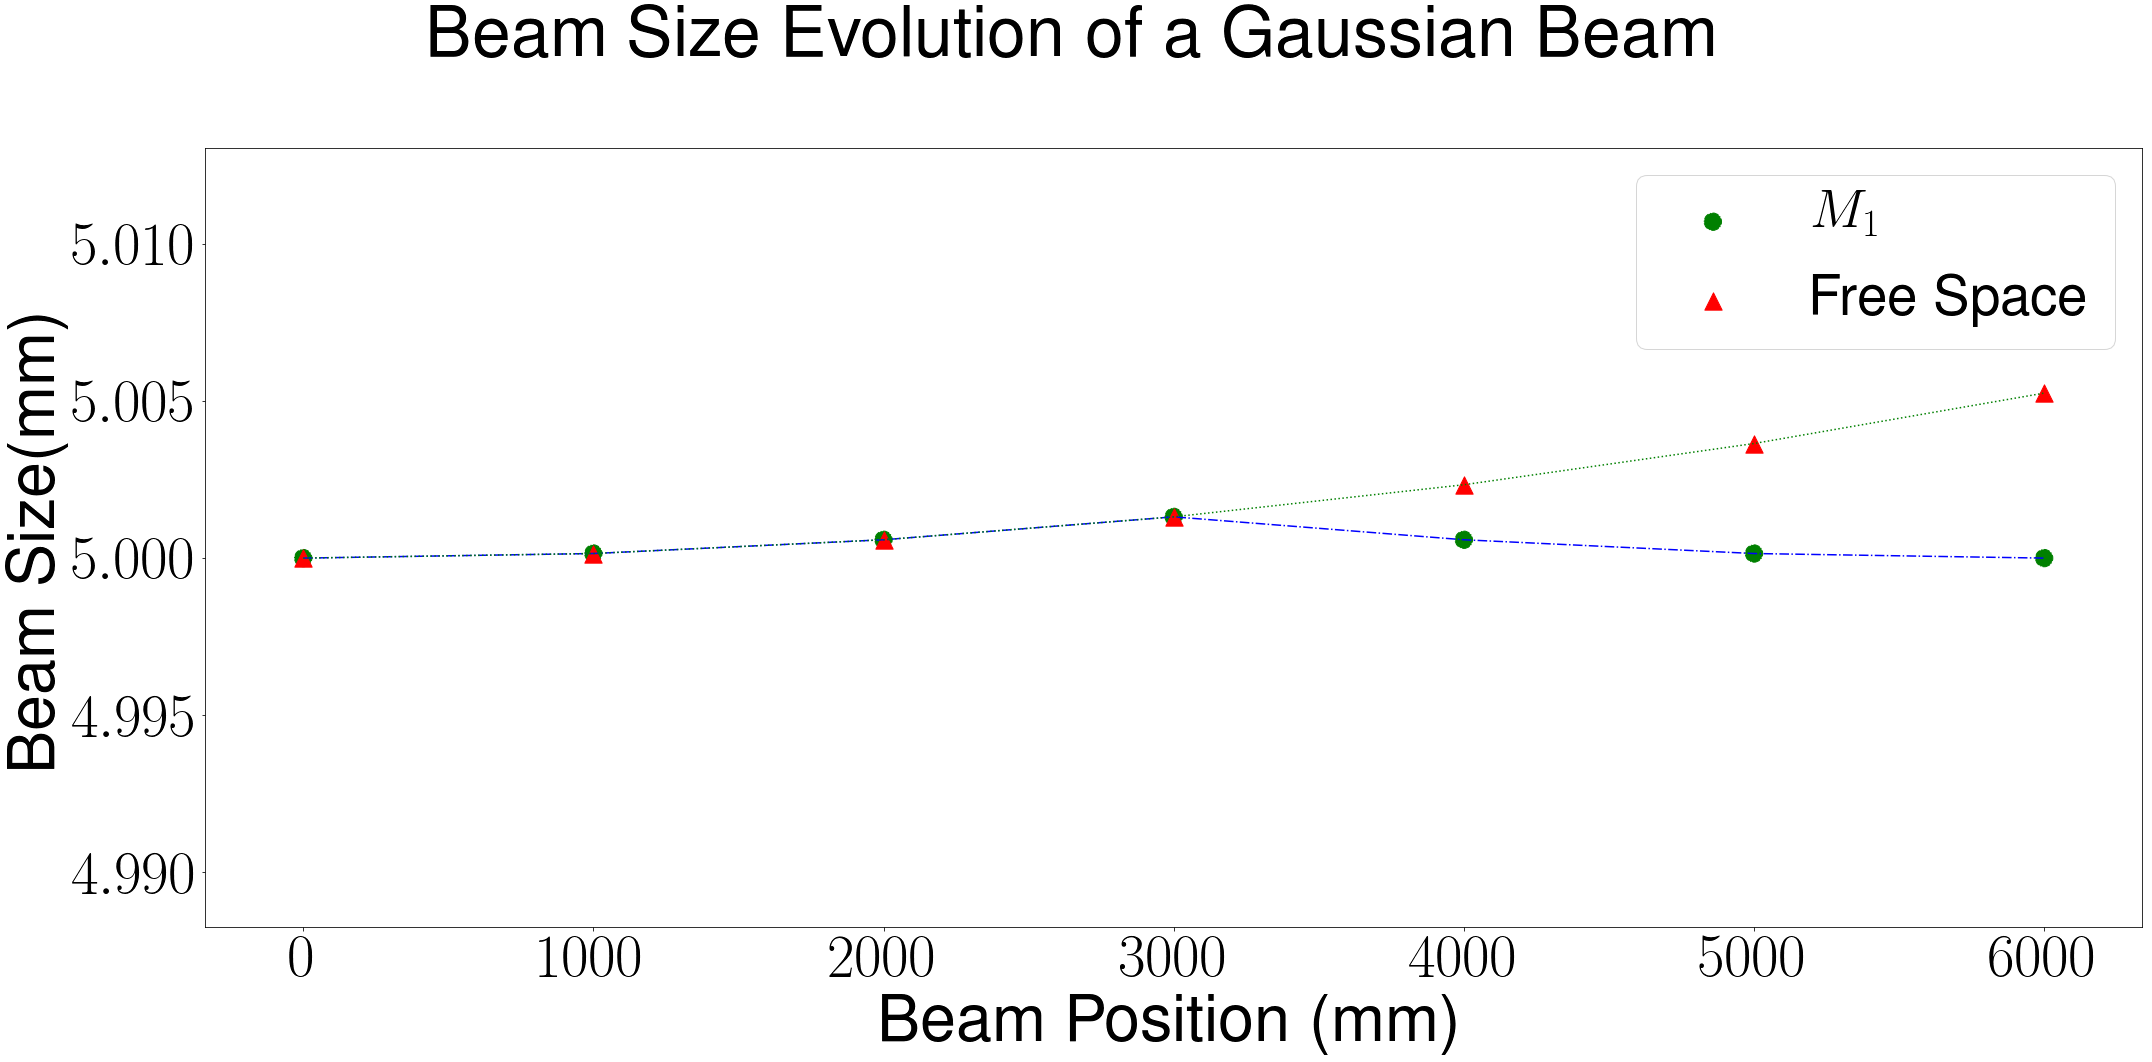

In [8]:
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'
from datetime import datetime
import sys
import os
import time

cpath= Popen(['pwd'], stdout=PIPE, stderr=PIPE).communicate()[0].decode('utf-8').rstrip()

f = filename_generator(cpath)
data_paths = data_pathfiles_generator(cpath)
m_datap = []
n_datap=[]
for i in data_paths:
    if 'run' in i:
        m_datap.append(i)
    elif 'norm' in i:
        n_datap.append(i)

mirror_data = data_generator(m_datap)
normal_data = data_generator(n_datap)




waists_m = np.multiply(2, fit_parameter_extractor(gaussian, mirror_data)[2])
waist_n = np.multiply(2, fit_parameter_extractor(gaussian, normal_data)[2])

print(waist_n)
print(waists_m)
pos_m = np.arange(0,7000,1000)

x = pos_m
ym = waists_m
yn = waist_n
cycol = cycle('bgrcmk')
fig = plt.figure(figsize=(30,15))
axes = fig.add_subplot(1, 1, 1)
axes.scatter(x, ym, color = 'green', linestyle = '-.', s=300, label = '$M_1$')
axes.scatter(x, yn, color = 'red', s=300, marker = '^', label = 'Free Space')
axes.plot(x,ym, c=next(cycol), linestyle = '-.')
axes.plot(x,yn, c=next(cycol), linestyle = ':')
axes.tick_params(axis='both',labelsize=55)
axes.legend(fontsize =55)
axes.set_xlabel(str('Beam Position (mm)'), fontsize=55+10)
axes.set_ylabel(str('Beam Size(mm)'), fontsize=55+10)
axes.tick_params(axis='both',labelsize=55+5)
axes.legend(loc = 'upper right', fontsize=55)
fig.suptitle('Beam Size Evolution of a Gaussian Beam', fontsize=55+15)
fig.tight_layout()
fig.subplots_adjust(top=0.85)






#fig.savefig(cpath+ '/'+'mirrortest' + "-" + datetime.now().strftime("%Y-%m-%d-%H-%M-%S")+'.jpg', dp1=16000)